In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1 )
Y = data['median_house_value']
train_X, test_X , train_Y ,test_Y = train_test_split(X,Y ,test_size=0.2 )

train_data = train_X.join(train_Y)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

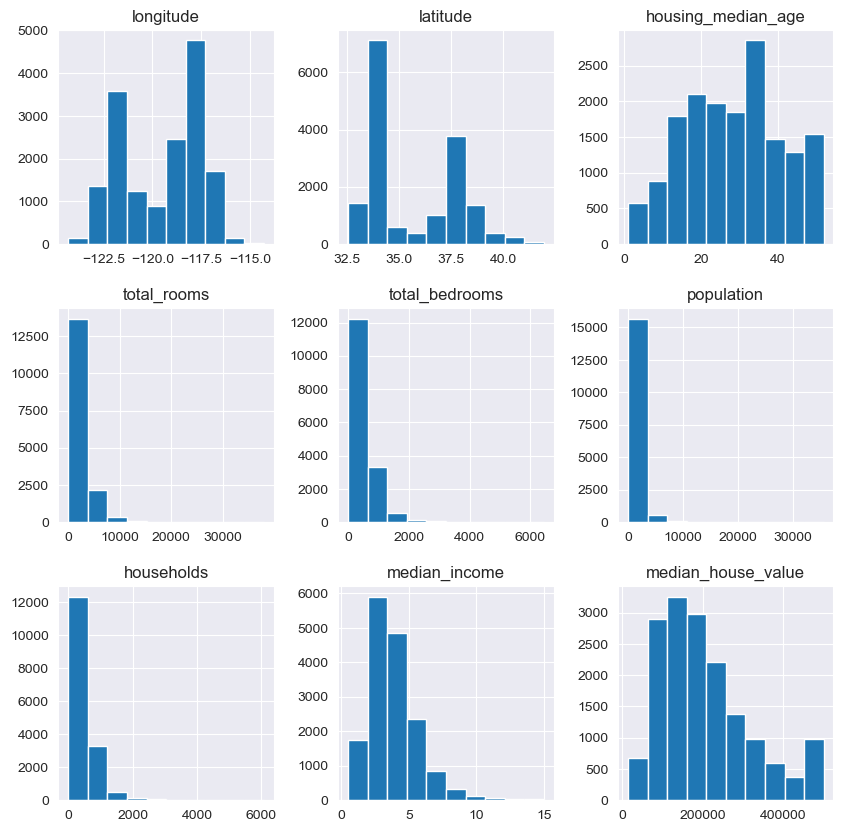

In [6]:

train_data.hist(figsize=(10,10))

In [7]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7207
INLAND        5208
NEAR OCEAN    2092
NEAR BAY      1835
ISLAND           4
Name: count, dtype: int64

In [8]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)


<Axes: >

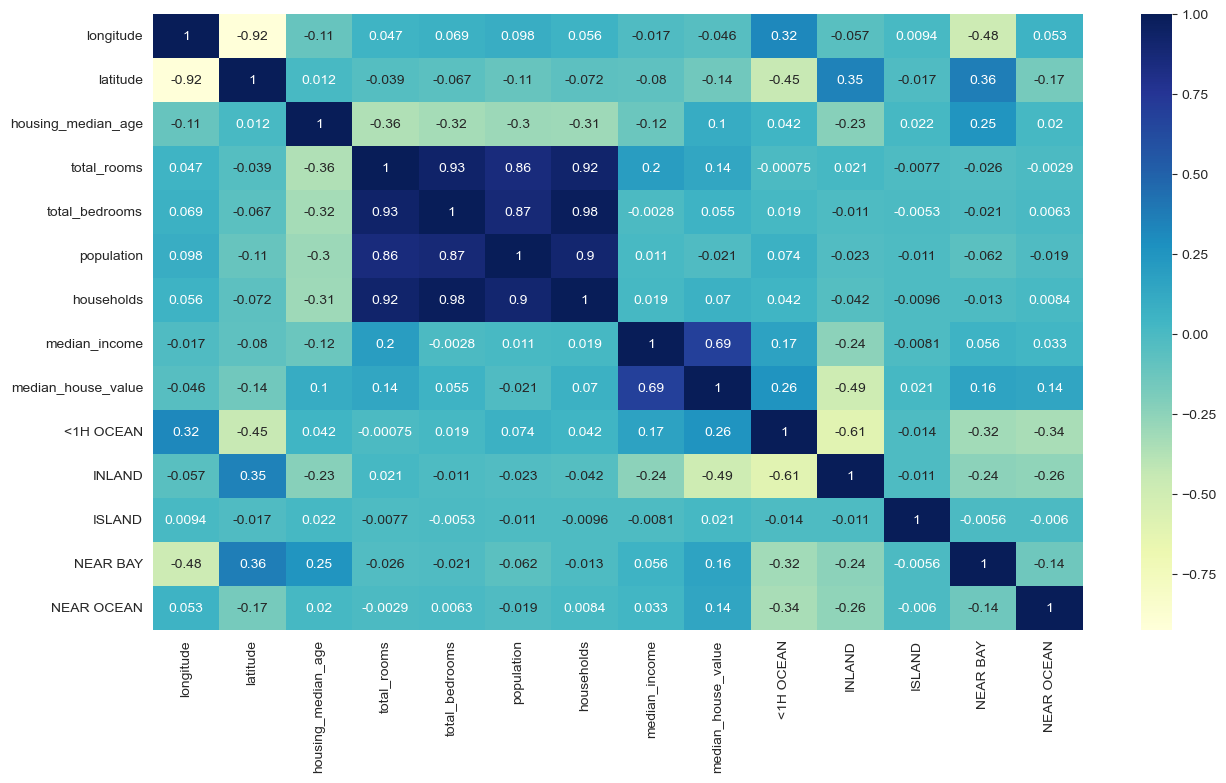

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True ,cmap='YlGnBu')


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

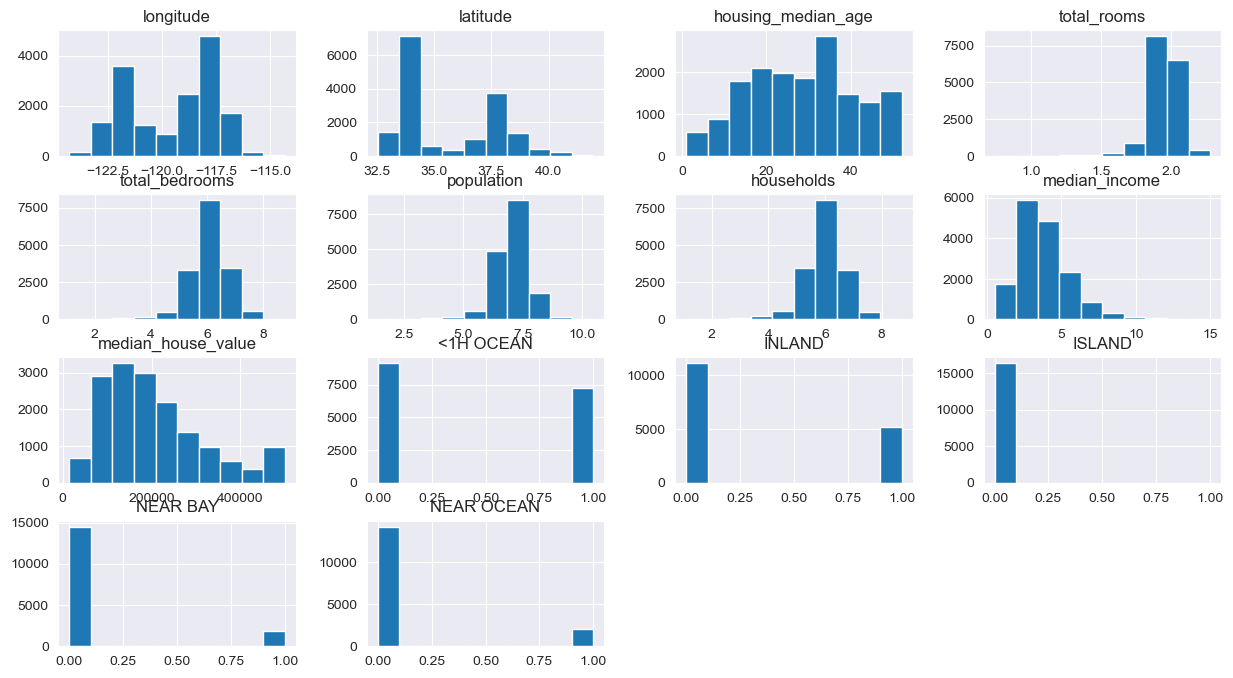

In [10]:
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['total_rooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)
train_data.hist(figsize=(15,8))

<Figure size 3000x3600 with 0 Axes>

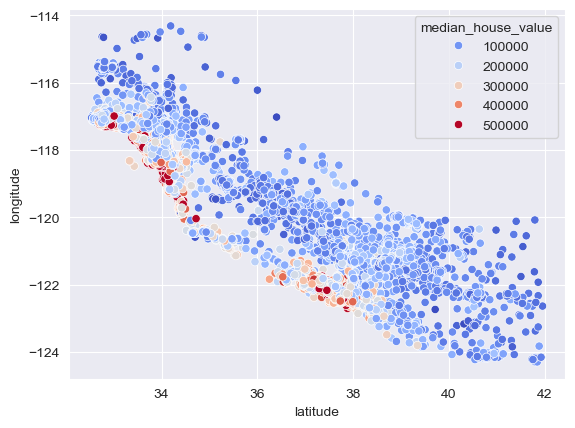

<Figure size 3000x3600 with 0 Axes>

In [11]:
sns.scatterplot(x="latitude",y="longitude", hue='median_house_value',data=train_data,palette="coolwarm")
plt.figure(figsize=(30,36))

<Axes: >

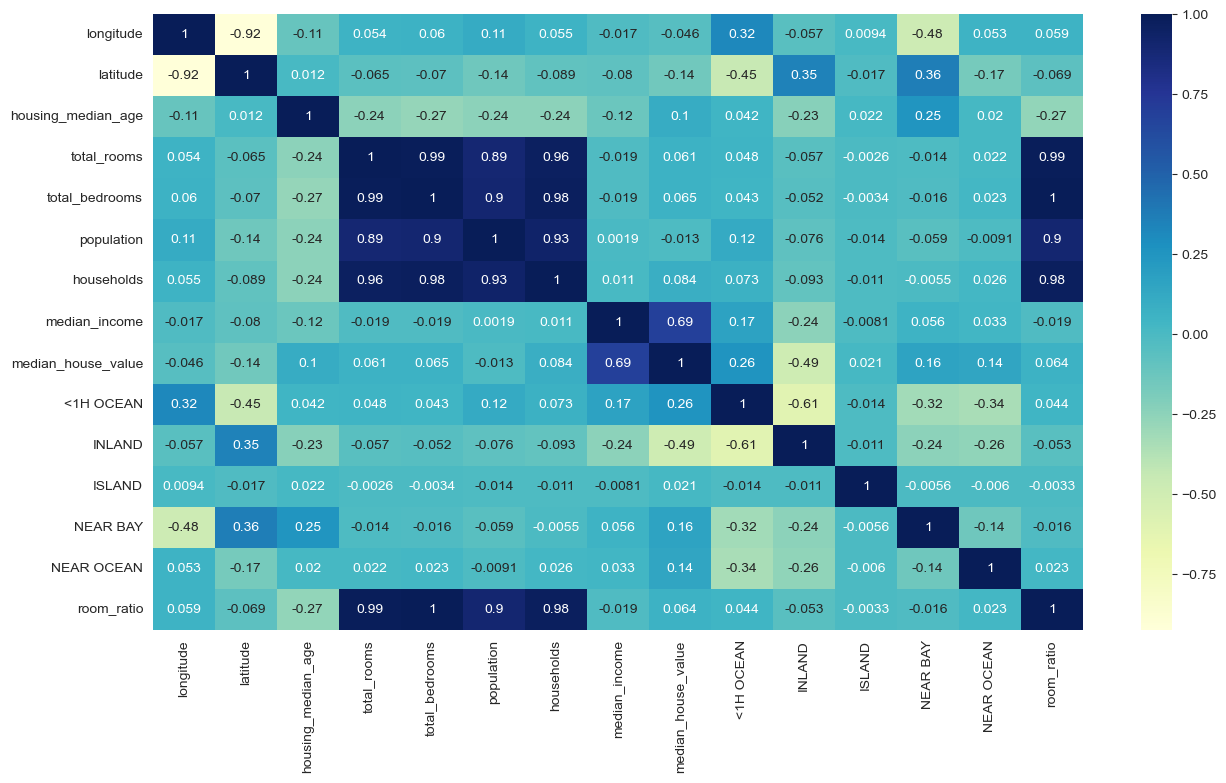

In [12]:
plt.figure(figsize=(15,8))
train_data["room_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
sns.heatmap(train_data.corr(),annot=True ,cmap='YlGnBu')

In [18]:
from sklearn.linear_model import  LinearRegression
X_train ,Y_train = train_data.drop(['median_house_value'],axis=1 ),train_data['median_house_value']
regression =LinearRegression()

regression.fit(X_train,Y_train)

LinearRegression()

In [19]:
test_data = test_X.join(test_Y)

test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['total_rooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

test_data["room_ratio"] = test_data["total_bedrooms"]/test_data  ["total_rooms"]


In [20]:
X_test , Y_test = test_data.drop(['median_house_value'],axis=1 ),test_data['median_house_value']
scaler = StandardScaler().fit(X_train)

In [16]:
regression.score(X_test,Y_test)

0.6756471293667403

In [17]:
from  sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,Y_train)
forest.score(X_test,Y_test)

0.8301237924763765